In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [49]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [2]:
path="D:\\Mark\\python\\Python-with-ML\\Data\\pima-indians-diabetes-database"

In [3]:
# load dataset
pima = pd.read_csv(path+"\\diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
pregnant    769 non-null object
glucose     769 non-null object
bp          769 non-null object
skin        769 non-null object
insulin     769 non-null object
bmi         769 non-null object
pedigree    769 non-null object
age         769 non-null object
label       769 non-null object
dtypes: object(9)
memory usage: 54.1+ KB


In [6]:
pima=pima.drop(pima.index[[0]])

In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [9]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 763 to 685
Data columns (total 7 columns):
pregnant    576 non-null object
insulin     576 non-null object
bmi         576 non-null object
age         576 non-null object
glucose     576 non-null object
bp          576 non-null object
pedigree    576 non-null object
dtypes: object(7)
memory usage: 36.0+ KB


In [11]:
X_train[X_train.pedigree.isna()]

,pregnant,insulin,bmi,age,glucose,bp,pedigree


In [39]:
#X_train["pedigree"]=X_train.pedigree.astype('float')

In [12]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 662 to 464
Data columns (total 7 columns):
pregnant    192 non-null object
insulin     192 non-null object
bmi         192 non-null object
age         192 non-null object
glucose     192 non-null object
bp          192 non-null object
pedigree    192 non-null object
dtypes: object(7)
memory usage: 12.0+ KB


In [13]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[119  11]
 [ 26  36]]


In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

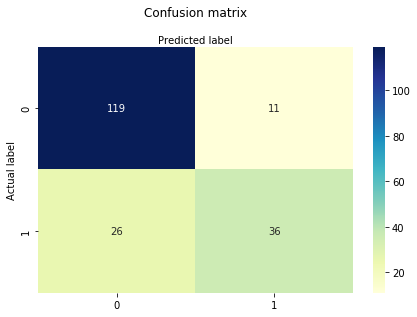

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
np.arange(len(class_names))

array([0, 1])

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


In [52]:
#ROC curve -- 
'''
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
'''

'\nReceiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.\n'

In [51]:
'''y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()'''

ValueError: Data is not binary and pos_label is not specified